In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_reviews(folder_path, sentiment):
    reviews = []
    for filename in os.listdir(folder_path):
        with open(os.path.join(folder_path, filename)) as file:
            review = file.read()
            reviews.append([review, sentiment])
    return reviews


postive = load_reviews('./data/pos/', 'Positive')
negative = load_reviews('./data/neg/', 'negative')

df_pos = pd.DataFrame(postive, columns=['Review', 'Sentiment'])
df_neg = pd.DataFrame(negative, columns=['Review', 'Sentiment'])

df = pd.concat([df_neg,df_pos], ignore_index=True)
df

,Review,Sentiment
0,"plot : two teen couples go to a church party ,...",negative
1,the happy bastard's quick movie review \ndamn ...,negative
2,it is movies like these that make a jaded movi...,negative
3,""" quest for camelot "" is warner bros . ' firs...",negative
4,synopsis : a mentally unstable man undergoing ...,negative
...,...,...
2055,Christopher Nolan deserves every superlative f...,Positive
2056,Nolan isn't interested in scaling down or tidy...,Positive
2057,With its everyone-and-the-kitchen-sink casting...,Positive
2058,"At three hours, it is too long -- as, sigh, al...",Positive


In [2]:

print(len(postive))
print(len(negative))

print(postive[0])
print(negative[0])

1030
1030
['films adapted from comic books have had plenty of success , whether they\'re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there\'s never really been a comic book like from hell before . \nfor starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid \'80s with a 12-part series called the watchmen . \nto say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . \nthe book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . \nin other words , don\'t dismiss this film because of its source . \nif you can get past the whole comic book thing , you might find another stumbling block in from hell\'s directors , albert and allen hughes . \ngetting the hughes brothers to direc

In [3]:


import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\roart\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\roart\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roart\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Axes(0.125,0.11;0.775x0.77)


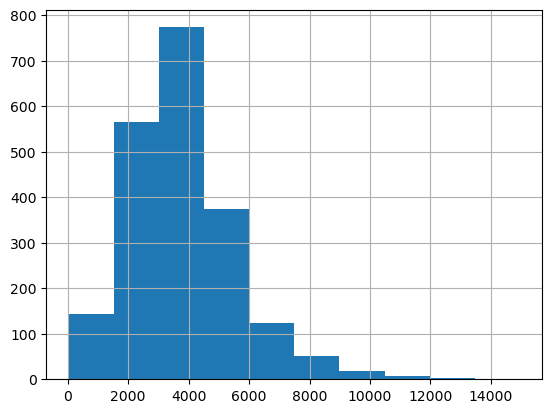

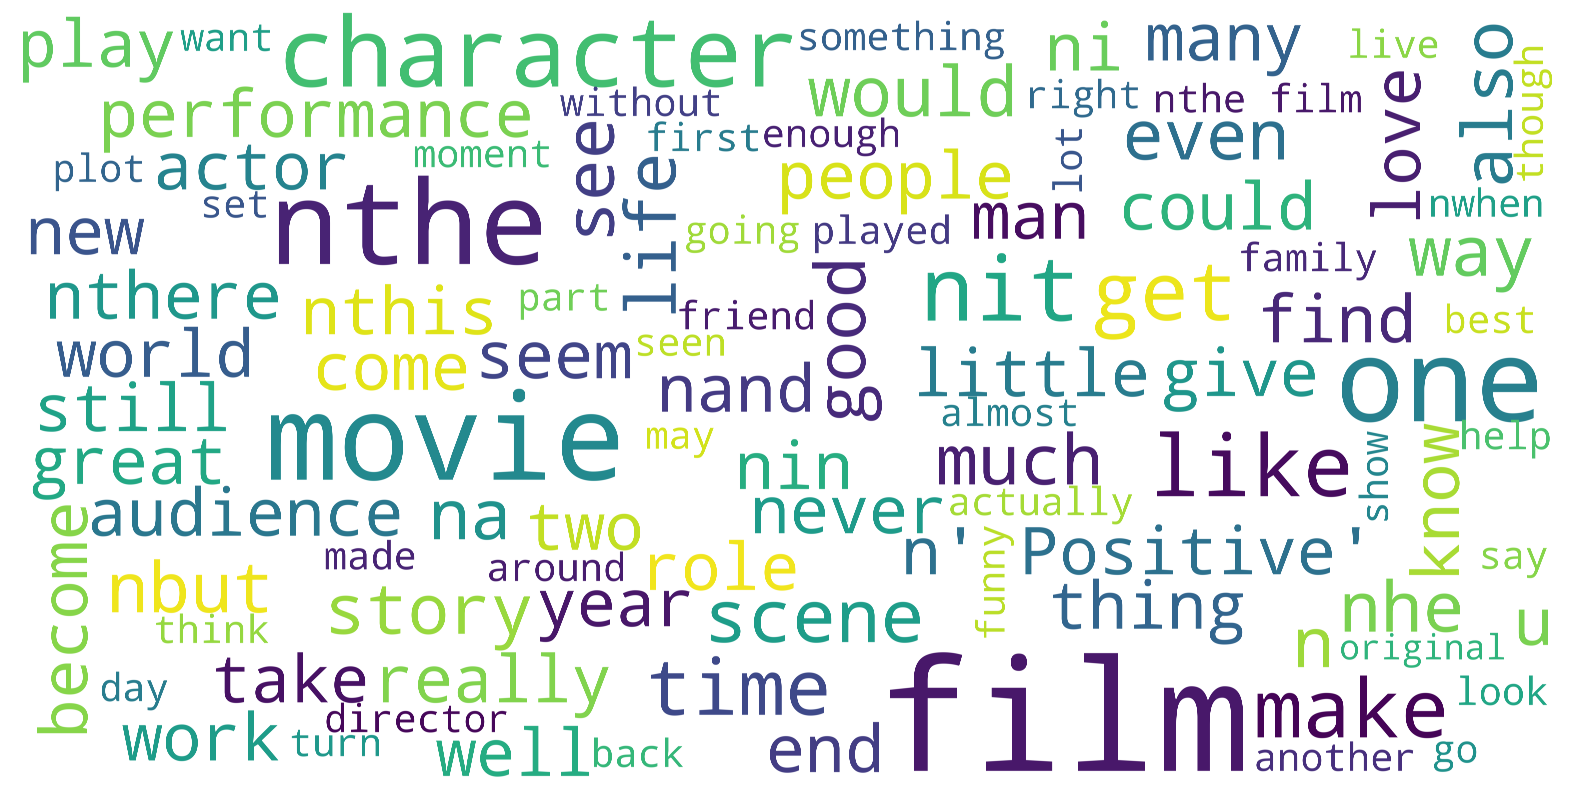

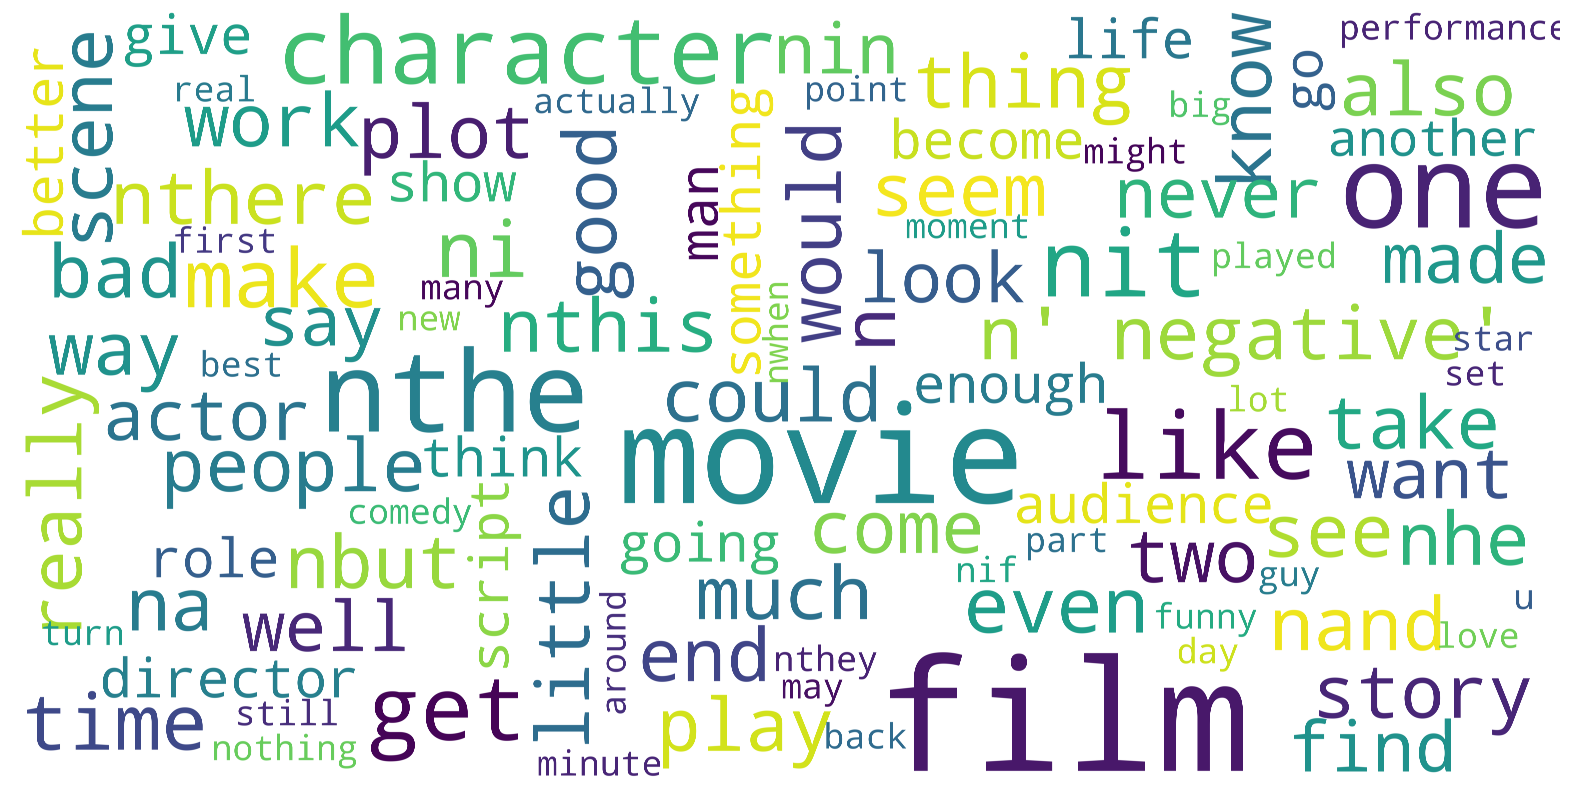

In [4]:

print(df['Review'].str.len().hist())

from wordcloud import WordCloud
stopwords = set(nltk.corpus.stopwords.words('english'))

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40,
        scale=100,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(2, figsize=(20, 20))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(postive)
show_wordcloud(negative)



In [5]:
stop = nltk.corpus.stopwords.words('english')
new = ['www','.com','http']
stop = stop + new
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def tokenize(text):
  nltk_stopwords = stop
  output_text = word_tokenize(text)
  output_text = [word for word in output_text if word.lower() not in nltk_stopwords]
  output_text = ' '.join(output_text)
  return output_text

def remove_punctuation(text):
  output = str(text).lower()
  output = str(text).translate(str.maketrans('','',string.punctuation))
  output = re.sub(r'\d+','',output)
  output = output.strip()
  output = ' '.join(output.split())

  return output

def lemmatize(sentence):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    output_text = ' '.join(lemmatized_words)
    return output_text


df['Review'] = df['Review'].apply(remove_punctuation)
df['Review'] = df['Review'].apply(tokenize)
df['Review'] = df['Review'].apply(lemmatize)
df

,Review,Sentiment
0,plot two teen couple go church party drink dri...,negative
1,happy bastard quick movie review damn yk bug g...,negative
2,movie like make jaded movie viewer thankful in...,negative
3,quest camelot warner bros first featurelength ...,negative
4,synopsis mentally unstable man undergoing psyc...,negative
...,...,...
2055,Christopher Nolan deserves every superlative t...,Positive
2056,Nolan isnt interested scaling tidying Heck one...,Positive
2057,everyoneandthekitchensink casting alternating ...,Positive
2058,three hour long sigh film day compared dimensi...,Positive


In [7]:
for index, sentiment in enumerate(df['Sentiment']):
    if sentiment == 'Positive':
        df.loc[index, 'Sentiment'] = 1
    else:
        df.loc[index, 'Sentiment'] = 0

df

,Review,Sentiment
0,plot two teen couple go church party drink dri...,0
1,happy bastard quick movie review damn yk bug g...,0
2,movie like make jaded movie viewer thankful in...,0
3,quest camelot warner bros first featurelength ...,0
4,synopsis mentally unstable man undergoing psyc...,0
...,...,...
2055,Christopher Nolan deserves every superlative t...,1
2056,Nolan isnt interested scaling tidying Heck one...,1
2057,everyoneandthekitchensink casting alternating ...,1
2058,three hour long sigh film day compared dimensi...,1


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df['Review'])
y = pd.get_dummies(df['Sentiment']).values

X = X.toarray()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
print(X_train)
print(len(y_train))      
print(X_test)      
print(len(y_test)) 
print(y_train[:10]) 
print(y_test[:10]) 

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05412471 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
1648
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
412
[[ True False]
 [False  True]
 [False  True]
 [False  True]
 [ True False]
 [ True False]
 [False  True]
 [False  True]
 [False  True]
 [False  True]]
[[False  True]
 [ True False]
 [False  True]
 [False  True]
 [ True False]
 [False  True]
 [ True False]
 [ True False]
 [False  True]
 [ True False]]


In [9]:
len(X_train[0])

5000

In [10]:
print(X_train.shape)
print(X_test.shape)

(1648, 5000)
(412, 5000)


In [11]:
from keras.models import Sequential
from keras.layers import Dense
num_epochs = 10

model = Sequential()
model.add(Dense(64,input_dim=X.shape[1],activation='relu'))

model.add(Dense(2,activation='softmax'))

model.summary()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history= model.fit(X_train,y_train,epochs=num_epochs, validation_data=(X_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320064    
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 320,194
Trainable params: 320,194
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
52/52 [==============================] - 1s 6ms/step - loss: 0.6488 - accuracy: 0.6936 - val_loss: 0.5807 - val_accuracy: 0.8131
Epoch 2/10
52/52 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.9084 - val_loss: 0.4540 - val_accuracy: 0.8107
Epoch 3/10
52/52 [==============================] - 0s 2ms/step - loss: 0.2454 - accuracy: 0.9648 - val_loss: 0.3863 - val_accuracy: 0.8398
Epoch 4/10
52/52 [========

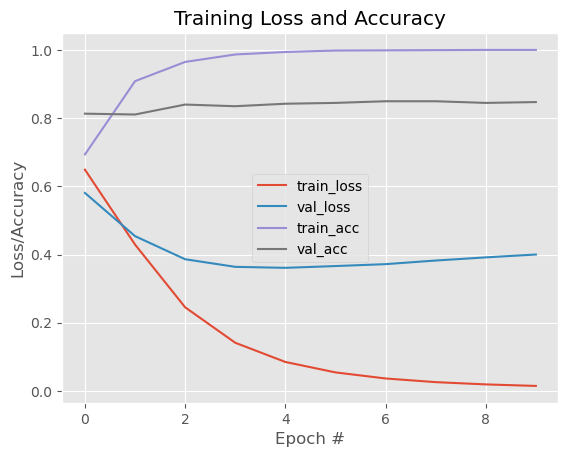

In [12]:
import matplotlib.pyplot as plt

def plot_graphs(H, metric):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #" )
  plt.ylabel("Loss/Accuracy" )
  plt.legend()
  plt.savefig("model history")
  plt.show( )
plot_graphs(history,'acc')

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
 
predicted = model.predict(X_test)
predicted_label=[np.argmax(each) for each in np.array(predicted)]
y_test_label=[np.argmax(each) for each in np.array(y_test)]
print("\nConfusion matrix:")
print(confusion_matrix(y_test_label, predicted_label))
print(classification_report(y_test_label, predicted_label))

13/13 [==============================] - 0s 3ms/step

Confusion matrix:
[[179  34]
 [ 29 170]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       213
           1       0.83      0.85      0.84       199

    accuracy                           0.85       412
   macro avg       0.85      0.85      0.85       412
weighted avg       0.85      0.85      0.85       412



In [14]:
#use the following text for prediction
neg_text="Just when you think you’ve seen the worst movie ever made,\
along comes this pile of toxic waste."

pos_text='This is going to go down as one of 2022’s most entertaining motion pictures.'


In [15]:
def encode_sentence(input_text):
    encoded_text = vectorizer.transform([input_text])
    encoded_text = encoded_text.toarray()
    return encoded_text


def prediction(encoded_text):
    predictions = model.predict(encoded_text)
    predicted_class = np.argmax(predictions)
    print("The predicted probability is:", predictions)
    print("The predicted class is:", predicted_class)

    if predicted_class == 0:
        print("The provided text is classified as: Negative")
    else:
        print("The provided text is classified as: Positive")

In [16]:

ped = encode_sentence(neg_text)
prediction(ped)

pred = encode_sentence(pos_text)
prediction(pred)

1/1 [==============================] - 0s 16ms/step
The predicted probability is: [[0.9926016  0.00739846]]
The predicted class is: 0
The provided text is classified as: Negative
1/1 [==============================] - 0s 14ms/step
The predicted probability is: [[0.36407286 0.63592714]]
The predicted class is: 1
The provided text is classified as: Positive


In [17]:
from sklearn.metrics.pairwise import cosine_similarity

neg_text="Just when you think you’ve seen the worst movie ever made,\
along comes this pile of toxic waste."

pos_text='This is going to go down as one of 2022’s most entertaining motion pictures.'

from sklearn.metrics.pairwise import cosine_similarity

def get_cosine_similarity(text1, text2):
    vectors = vectorizer.fit_transform([text1, text2])
    similarity = cosine_similarity(vectors[0], vectors[1])
    return similarity[0][0]


cosine = get_cosine_similarity(neg_text, pos_text)
print(cosine)


0.06274211398105577
